In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Xác suất dự đoán: [[5.7647111e-07 6.7501311e-08 7.0811040e-10 4.3635004e-07 4.9921709e-08
  1.9526881e-07 4.7651603e-09 9.4220343e-07 5.0420010e-07 1.3373759e-08
  9.9750936e-01 1.2358596e-03 3.0315458e-04 6.8708578e-06 4.2576303e-07
  1.2287653e-04 4.6496003e-04 3.7509317e-06 4.1342273e-07 7.3882838e-09
  2.7571582e-07 2.0613418e-06 2.5053136e-08 1.6590253e-08 1.9871788e-06
  1.4916805e-06 4.9075974e-09 6.1703821e-07 4.1422584e-07 1.2755277e-05
  8.1449009e-08 1.7137202e-08 4.9690485e-08 7.0285509e-08 1.2047983e-07
  1.4992555e-07 5.3976798e-08 1.0324497e-05 3.1025121e-07 1.2619869e-07
  1.3820822e-06 4.0697648e-10 3.3518106e-07 2.1050339e-09 3.7746156e-06
  5.2323266e-09 1.3821725e-09 5.8606435e-09 2.6057773e-10 9.0441567e-08
  2.5024528e-08 5.8289720e-07 9.1485569e-10 2.6932000e-06 9.7568886e-09
  7.0266204e-08 5.8522687e-08 1.9612246e-07 2.9191648e-08 1.5750355e-06
  1.8525591e-07 1.0745358e-06 1.2945088e-07 1.9286728e-09 4.6295745e-06
  5.472473

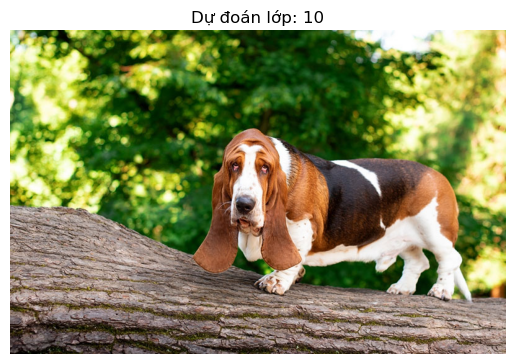

In [44]:
# Load mô hình đã lưu
model = tf.keras.models.load_model('dog_classifier_model_fine_tuned.h5')

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """
    Hàm này tải ảnh từ đường dẫn, resize về kích thước target_size,
    chuyển đổi ảnh thành mảng numpy và chuẩn hóa giá trị pixel.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # chuẩn hóa giá trị pixel về [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # thêm batch dimension
    return img_array

# Đường dẫn tới ảnh cần phân loại
img_path = './123.jpg'

# Tiền xử lý ảnh
img_preprocessed = load_and_preprocess_image(img_path)

# Dự đoán với mô hình
predictions = model.predict(img_preprocessed)

# Hiển thị các xác suất dự đoán
print("Xác suất dự đoán:", predictions)

# Lấy chỉ số nhãn có xác suất cao nhất
predicted_class = np.argmax(predictions, axis=1)[0]
print("Chỉ số lớp dự đoán:", predicted_class)

# Nếu có bản đồ lớp (ví dụ: dictionary ánh xạ chỉ số sang tên lớp), bạn có thể ánh xạ lại như sau:
# class_labels = {0: 'Chó beagle', 1: 'Chó poodle', ...}
# predicted_label = class_labels[predicted_class]
# print("Nhãn được dự đoán:", predicted_label)

# Hiển thị ảnh đã phân loại
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Dự đoán lớp: {predicted_class}')
plt.axis('off')
plt.show()

In [46]:
with open('class_indices.json', 'r', encoding='utf-8') as f:
    class_labels = json.load(f)

predicted_label = class_labels[str(predicted_class)]
print("Tên giống chó dự đoán:", predicted_label)

Tên giống chó dự đoán: basset
